In [78]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

In [79]:
# 28 x 28 hand-written images of digits 0-9. 
mnist = tf.keras.datasets.mnist          

In [80]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # split the dataset into training and test sets.

In [81]:
x_train[0]   # Each pixel of the image has intensity between 0 and 255.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [82]:
# Normalize (scale) the training and testing sets so that the pixel intensity is normalized between 0 and 1.
# Normalizing the data generally speeds up learning and leads to faster convergence.

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [83]:
x_train[0]   # Each pixel value is now normalized between 0 and 1.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [84]:
# Building the Model
 
model = tf.keras.models.Sequential() # Sequential groups a linear stack of layers into a model.
model.add(tf.keras.layers.Flatten()) # This is the input layer flattened as the original images are 28 x 28.

# We are using 2 hidden layers with 128 units (neurons) with ReLU as the activation function. Activation function
# of a node is used to define the output of that node given an input or set of inputs.
# ReLU (rectified linear) is widely used and is default choice as it yields better results.
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))

# This is the output layer. We use units=10 because this is a classfication problem and we have 10 classes
# Softmax converts a vector of numbers into a vector of probabilities (probability distribution). It is commonly
# used as an activation function in a neural network for classification problems.
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

# Now, lets configure the model for training. 
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order 
# and second-order moments.
# The neural network will optimize to minimize the loss function. Sparse categorical crossentropy produces 
# a category index of the most likely matching category. 
# The metric to be evaluated during training is accuracy.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Finally, lets train the model. 
# Running one epoch is like training a neural network with the entire training data for one cycle.
# As we are running 4 epochs, that is like doing 4 cycles on all the training data.  
model.fit(x_train,y_train,epochs=4)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2616 - accuracy: 0.9239
Epoch 2/4
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1063 - accuracy: 0.9672
Epoch 3/4
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0716 - accuracy: 0.9774
Epoch 4/4
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0521 - accuracy: 0.9832


In [85]:
# Generate predictions on unseen test set.
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

In [86]:
# Weighted - Calculate metrics for each label, and find their average weighted by support (the number of true 
# instances for each label). 

precision_score(y_test, y_pred , average="weighted") # Compute precision

0.9717012819512368

In [87]:
recall_score(y_test, y_pred , average="weighted") # Compute recall

0.9712

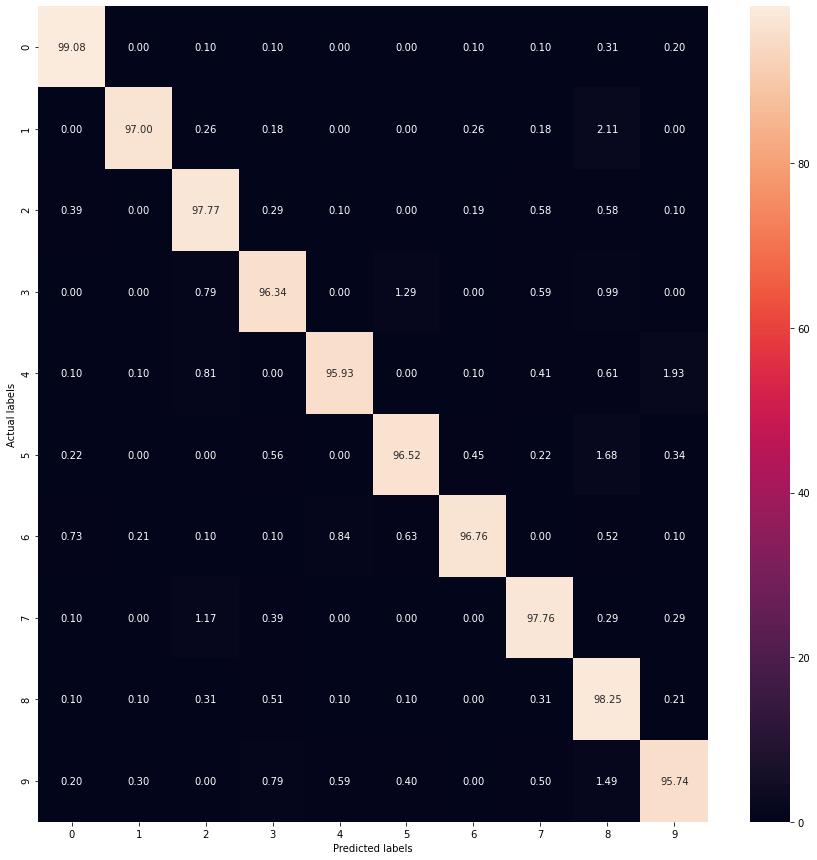

In [88]:
# Confusion Matrix
label_names=['0','1','2','3','4','5','6','7','8','9']
cm =confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmn = cmn * 100
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label_names, yticklabels=label_names)
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show(block=False)

Actual Digit :


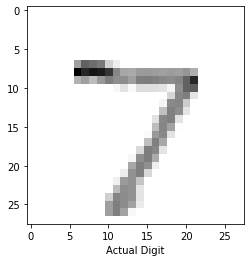

Predicted Digit :  7


In [89]:
# Here is a sample test image and its predicted value
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.xlabel('Actual Digit')
print("Actual Digit :")
plt.show()
print("Predicted Digit : ", y_pred[0])